In [111]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import time

Response: imdb_score

In [58]:
movies = pd.read_csv('movie_metadata.csv')
list(movies.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# IMDB SCORE
#### If score is above 75% quartile movie is good (1), else bad (0)

In [59]:
good_score = movies['imdb_score'].quantile(0.75)
movies['good_movie'] = movies['imdb_score'].apply(lambda x: 1 if x >= good_score else 0)

In [60]:
movies.corrwith(movies.good_movie).sort_values(ascending = False)

good_movie                   1.000000
imdb_score                   0.681022
num_voted_users              0.364947
num_user_for_reviews         0.272405
movie_facebook_likes         0.232860
num_critic_for_reviews       0.221334
duration                     0.200878
gross                        0.165646
director_facebook_likes      0.163755
aspect_ratio                 0.066005
actor_2_facebook_likes       0.043753
cast_total_facebook_likes    0.042055
actor_1_facebook_likes       0.038629
actor_3_facebook_likes       0.027265
budget                       0.000898
facenumber_in_poster        -0.066470
title_year                  -0.197580
dtype: float64

In [61]:
missing_values_sum = movies.isna().sum()
print(missing_values_sum)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
good_movie                     0
dtype: int64


# EDA

### GENRE

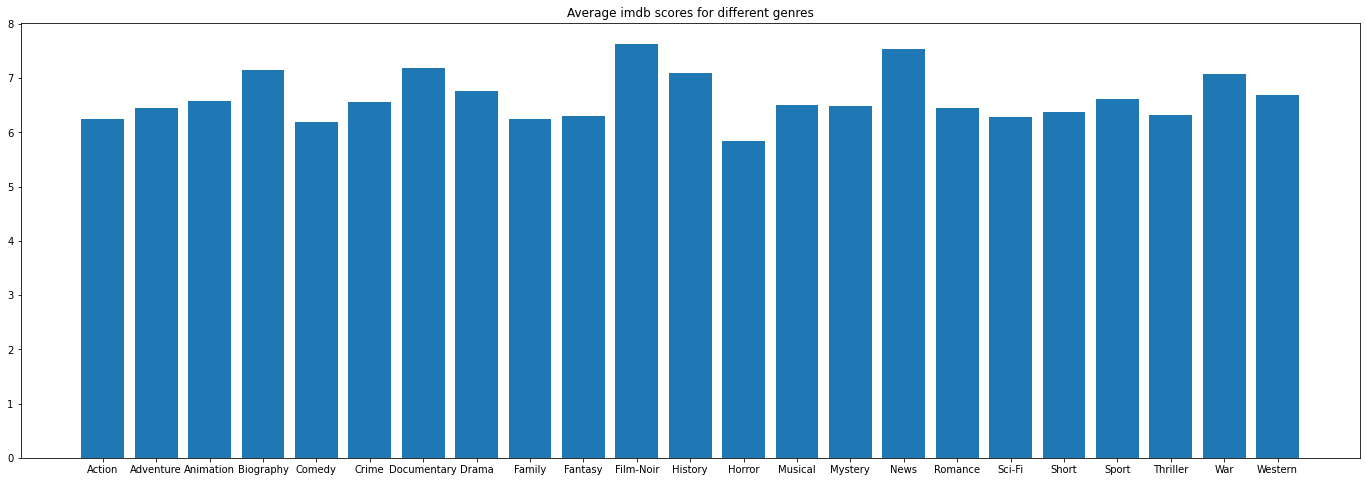

In [62]:
genres_df = movies.loc[:, ["genres", "imdb_score"]].copy()

genres_df["Action"] = [1 if "Action" in genre else 0 for genre in genres_df["genres"]]
genres_df["Adventure"] = [1 if "Adventure" in genre else 0 for genre in genres_df["genres"]]
genres_df["Animation"] = [1 if "Animation" in genre else 0 for genre in genres_df["genres"]]
genres_df["Biography"] = [1 if "Biography" in genre else 0 for genre in genres_df["genres"]]
genres_df["Comedy"] = [1 if "Comedy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Crime"] = [1 if "Crime" in genre else 0 for genre in genres_df["genres"]]
genres_df["Documentary"] = [1 if "Documentary" in genre else 0 for genre in genres_df["genres"]]
genres_df["Drama"] = [1 if "Drama" in genre else 0 for genre in genres_df["genres"]]
genres_df["Family"] = [1 if "Family" in genre else 0 for genre in genres_df["genres"]]
genres_df["Fantasy"] = [1 if "Fantasy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Film-Noir"] = [1 if "Film-Noir" in genre else 0 for genre in genres_df["genres"]]
genres_df["History"] = [1 if "History" in genre else 0 for genre in genres_df["genres"]]
genres_df["Horror"] = [1 if "Horror" in genre else 0 for genre in genres_df["genres"]]
genres_df["Musical"] = [1 if "Musical" in genre else 0 for genre in genres_df["genres"]]
genres_df["Mystery"] = [1 if "Mystery" in genre else 0 for genre in genres_df["genres"]]
genres_df["News"] = [1 if "News" in genre else 0 for genre in genres_df["genres"]]
genres_df["Romance"] = [1 if "Romance" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sci-Fi"] = [1 if "Sci-Fi" in genre else 0 for genre in genres_df["genres"]]
genres_df["Short"] = [1 if "Short" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sport"] = [1 if "Sport" in genre else 0 for genre in genres_df["genres"]]
genres_df["Thriller"] = [1 if "Thriller" in genre else 0 for genre in genres_df["genres"]]
genres_df["War"] = [1 if "War" in genre else 0 for genre in genres_df["genres"]]
genres_df["Western"] = [1 if "Western" in genre else 0 for genre in genres_df["genres"]]


means = []
for column in genres_df.columns[2:]:
    means.append(genres_df.loc[genres_df[column] == 1, "imdb_score"].mean())

    
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=genres_df.columns[2:], height=means)
plt.title("Average imdb scores for different genres")
plt.show()

### Country

In [63]:
movies['country'] = pd.Categorical(movies['country'])

movies['country'] = movies['country'].cat.add_categories('Others')

movies.loc[~movies['country'].isin(['USA', 'UK']), 'country'] = 'Others'

movies['country'] = pd.Categorical(movies['country'])

In [64]:
# Create dummy variables for the 'country' column
dummies = pd.get_dummies(movies['country'], prefix = 'country')

# Add the dummy variables to the original DataFrame
movies = pd.concat([movies, dummies], axis=1)

# Drop the original 'country' column
movies.drop('country', axis=1, inplace=True)

In [65]:
# create a list of columns to be removed
cols_to_remove = [col for col in movies.columns if col.startswith('country') and col not in ['country_UK', 'country_USA', 'country_Others']]

# drop the columns from the dataframe
movies.drop(cols_to_remove, axis=1, inplace=True)

In [66]:
list(movies.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'good_movie',
 'country_UK',
 'country_USA',
 'country_Others']

### Facebook likes

In [67]:
#combining all actor facebook likes
movies['actors_facebook_likes'] = movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']

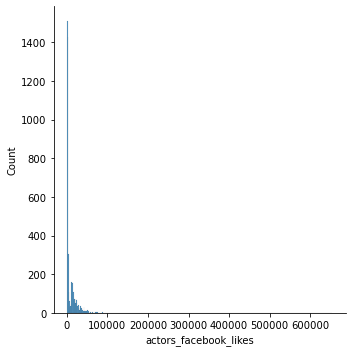

In [68]:
sns.displot(movies, x="actors_facebook_likes")

In [69]:
# If the actors have facebook likes greater than 75% of the others, they are famous (1) else not (0)
famous = movies['actors_facebook_likes'].quantile(0.7)
movies['actors_facebook_likes'] = movies['actors_facebook_likes'].apply(lambda x: 1 if x > famous else 0)

### Budget

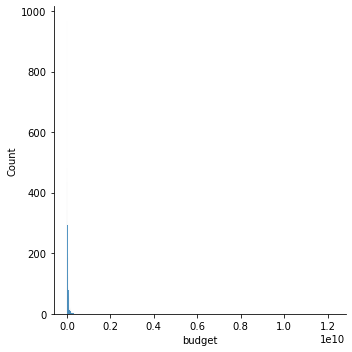

In [70]:
sns.displot(movies, x="budget")

In [71]:
print('MAX:', movies['budget'].max(), ', MIN:', movies['budget'].min(), ', AVG:', movies['budget'].mean())

MAX: 12215500000.0 , MIN: 218.0 , AVG: 39752620.436387606


In [72]:
# if budget > average, expensive (1), else cheap (0)
movies['budget'] = movies['budget'].apply(lambda x: 1 if x > movies['budget'].mean() else 0)

## Check correlation

In [73]:
movies.corrwith(movies.good_movie).sort_values(ascending = False)

good_movie                   1.000000
imdb_score                   0.681022
num_voted_users              0.364947
num_user_for_reviews         0.272405
movie_facebook_likes         0.232860
num_critic_for_reviews       0.221334
duration                     0.200878
gross                        0.165646
director_facebook_likes      0.163755
country_UK                   0.081439
country_Others               0.080515
aspect_ratio                 0.066005
actors_facebook_likes        0.052131
actor_2_facebook_likes       0.043753
cast_total_facebook_likes    0.042055
actor_1_facebook_likes       0.038629
actor_3_facebook_likes       0.027265
budget                      -0.057380
facenumber_in_poster        -0.066470
country_USA                 -0.121831
title_year                  -0.197580
dtype: float64

# CREATING THE MODEL

In [98]:
def confusion_matrix_train(model,cutoff=0.43):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

### Model 1 (all predictors)

In [107]:
# creating a model using predictors with high correlation
logit_model1 = sm.logit(data = movies, formula = 'good_movie ~ duration + director_facebook_likes + country_UK + country_USA + country_Others + aspect_ratio + actors_facebook_likes + budget + facenumber_in_poster').fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.520436
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 4617
Model:                          Logit   Df Residuals:                     4608
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1159
Time:                        18:18:58   Log-Likelihood:                -2402.9
converged:                       True   LL-Null:                       -2717.8
Covariance Type:            nonrobust   LLR p-value:                8.504e-131
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.3405        nan        nan        nan         nan   

NameError: name 'logit_modell' is not defined

Classification accuracy = 76.1%
Precision = 62.2%
TPR or Recall = 33.5%
FNR = 66.5%
FPR = 7.7%


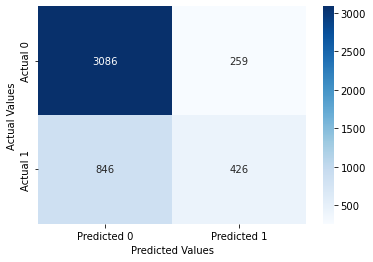

In [99]:
confusion_matrix_train(logit_model1)

In [40]:
logit_model = sm.logit(formula= 'good_movie ~ duration + title_year + director_facebook_likes * actors_facebook_likes + country_UK + country_USA + country_Others + budget', data = movies).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.512483
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 4923
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1201
Time:                        09:12:27   Log-Likelihood:                -2523.0
converged:                       True   LL-Null:                       -2867.2
Covariance Type:            nonrobust   LLR p-value:                2.180e-143
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                             

In [92]:
def confusion_matrix_train(model,cutoff=0.43):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

Classification accuracy = 76.1%
Precision = 62.2%
TPR or Recall = 33.5%
FNR = 66.5%
FPR = 7.7%


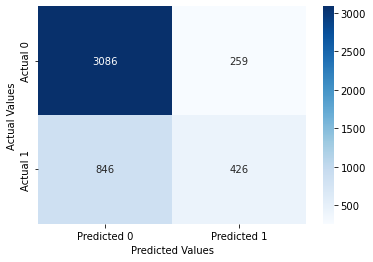

In [93]:
confusion_matrix_train(logit_model1)

# Gab work

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve, auc

In [95]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
# Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins = np.array([0,cutoff,1])
# Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index = {0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return cm_df

In [96]:
# Did not dummy budget for this one, wanted to try out a transformation instead
movies2 = movies.dropna()
movies2.budget

0       1
1       1
2       1
3       1
5       1
       ..
5026    0
5027    0
5033    0
5035    0
5042    0
Name: budget, Length: 3975, dtype: int64

In [93]:
logit_modelg = sm.logit(formula= 'good_movie ~ duration + director_facebook_likes * actors_facebook_likes + country_UK + country_USA + country_Others + budget + np.log(budget)', data = movies2).fit()
logit_modelg.summary()

Optimization terminated successfully.
         Current function value: 0.496666
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3747
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1453
Time:                        09:26:07   Log-Likelihood:                -1865.5
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                1.014e-131
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         0.8739        nan        nan        nan         nan         nan
duration                                          0.0368      0.002     16.458      0.000       0.032       0.041
director_facebook_likes                           0.0001   2.44e-05      5.670      0.000    9.06e-05       0.000
actors_facebook_likes                             0.5218      0.092      5.662      0.000       0.341       0.702
director_facebook_likes:actors_facebook_likes -5.841e-05   2.84e-05     -2.057      0.040      -0.000   -2.76e-06
country_UK                                        0.5566        nan        nan        nan         nan         nan
country_USA                                      -0.2409        nan        nan        nan         nan         nan
country_Others                                    0.5582        nan        nan        nan         nan         nan
budget                                           2.5e-10   1.57e-10      1.597      0.110   -5.68e-11    5.57e-10
np.log(budget)                                   -0.3750      0.031    -12.175      0.000      -0.435      -0.315
=================================================================================================================
"""

Classification accuracy = 76.4%
Precision = 64.3%
TPR or Recall = 29.2%
FNR = 70.8%
FPR = 6.0%
ROC-AUC = 74.8%


,Predicted 0,Predicted 1
Actual 0,2723.0,175.0
Actual 1,762.0,315.0


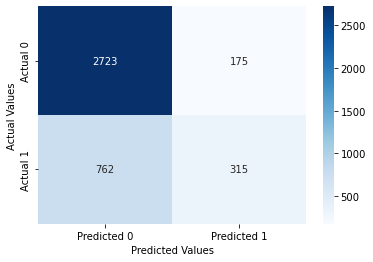

In [97]:
confusion_matrix_data(movies2, movies2.good_movie, logit_model1, cutoff = 0.46)

In [95]:
y = movies2.good_movie
y_pred = logit_modelg.predict(movies2)
fpr, tpr, auc_thresholds = roc_curve(y, y_pred)
print(auc(fpr, tpr)) # AUC of ROC

0.7631650099403579
